In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
symbols = ['MSFT', 'AAPL', 'NVDA', 'META', 'GOOG', 'AMZN', 'LLY', 'T', 'VZ', 'KEY', 'HBAN']
monthlyPrices0 = yf.download(symbols, '2019-01-01', interval = '1mo', auto_adjust = True)['Close']
monthlyPrices0.head()


[*********************100%***********************]  11 of 11 completed


Ticker,AAPL,AMZN,GOOG,HBAN,KEY,LLY,META,MSFT,NVDA,T,VZ
Date,,,,,,,,,,,
2019-01-01,39.564098,85.936501,55.402966,9.591663,11.783670,109.046730,165.533707,97.709587,3.563849,13.701268,37.508591
2019-02-01,41.159103,81.991501,55.579147,10.439262,12.635076,114.896652,160.330048,104.820503,3.824414,14.497371,39.180367
2019-03-01,45.346249,89.037498,58.228779,9.185973,11.268539,118.693428,165.533707,110.821480,4.456239,14.609174,40.701603
2019-04-01,47.905403,96.325996,58.981628,10.185635,12.679472,107.058258,192.058411,122.717354,4.491977,14.422829,39.366219
2019-05-01,41.793999,88.753502,54.770710,9.256341,11.537963,106.052063,176.238907,116.214989,3.361785,14.549109,37.796780


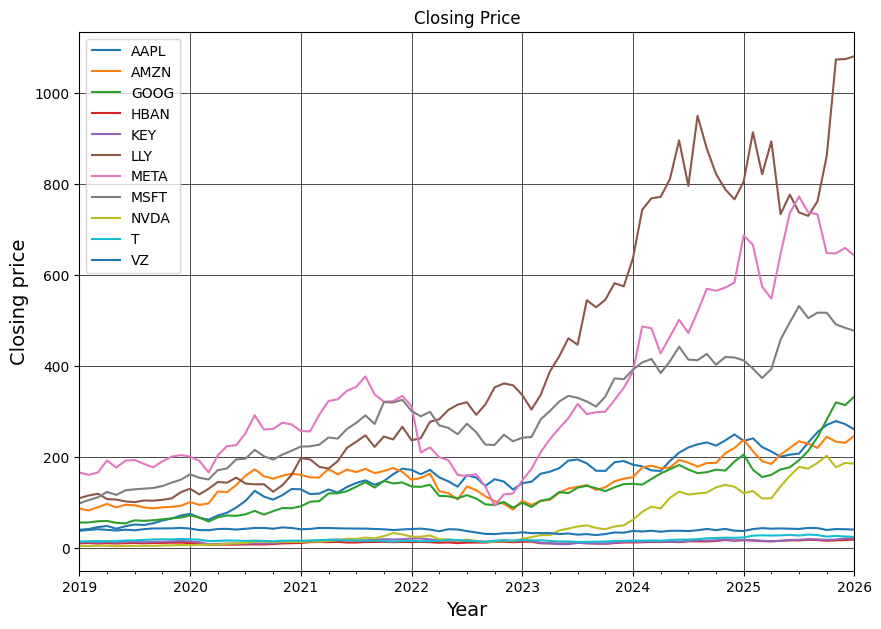

In [11]:
monthlyPrices0.plot(figsize=(10,7))
plt.legend()
plt.title('Closing Price')
plt.ylabel('Closing price', fontsize = 14)
plt.xlabel('Year', fontsize= 14)
plt.grid(which = 'major', color = 'k', linestyle = '-', linewidth = 0.5)
plt.show()

In [4]:
symbols = ['BTC-USD', 'MSFT', 'AAPL', 'NVDA', 'META', 'GOOG', 'AMZN', 'LLY', 'T', 'VZ', 'KEY', 'HBAN']
monthlyPrices = yf.download(symbols, '2019-01-01', interval = '1mo', auto_adjust = True)['Close']
monthlyPrices.head()

inflation = pd.read_csv('US-inflation.csv')
inflation

,Series Id,Year,Period,Value
0,CUUR0000SA0,2014,M01,0.4
1,CUUR0000SA0,2014,M02,0.4
2,CUUR0000SA0,2014,M03,0.6
3,CUUR0000SA0,2014,M04,0.3
4,CUUR0000SA0,2014,M05,0.3
...,...,...,...,...
136,CUUR0000SA0,2025,M05,0.2
137,CUUR0000SA0,2025,M06,0.3
138,CUUR0000SA0,2025,M07,0.2
139,CUUR0000SA0,2025,M08,0.3


In [5]:
inflation.Year = inflation.Year.astype(str)
inflation['Date'] = inflation.Year + '-' + inflation.Period.str[1:] + '-01'
inflation = inflation.set_index('Date')
inflation = inflation.rename(columns = {'Value': 'Inflation'})
inflation = inflation.drop(columns = ['Series Id', 'Year', 'Period'])
inflation

,Inflation
Date,
2014-01-01,0.4
2014-02-01,0.4
2014-03-01,0.6
2014-04-01,0.3
2014-05-01,0.3
...,...
2025-05-01,0.2
2025-06-01,0.3
2025-07-01,0.2


In [8]:
monthlyPrices.index = monthlyPrices.index.astype(str).str[:10]
monthlyChanges = monthlyPrices.pct_change()
monthlyChanges = monthlyChanges.join((inflation/100))
monthlyChanges = monthlyChanges.dropna()
monthlyChanges

,AAPL,AMZN,BTC-USD,GOOG,HBAN,KEY,LLY,META,MSFT,NVDA,T,VZ,Inflation
Date,,,,,,,,,,,,,
2019-02-01,0.040314,-0.045906,0.114811,0.003180,0.088369,0.072253,0.053646,-0.031436,0.072776,0.073113,0.058104,0.044570,0.004
2019-03-01,0.101731,0.085936,0.065015,0.047673,-0.120055,-0.108154,0.033045,0.032456,0.057250,0.165208,0.007712,0.038826,0.006
2019-04-01,0.056436,0.081859,0.303337,0.012929,0.108825,0.125210,-0.098027,0.160237,0.107342,0.008020,-0.012755,-0.032809,0.005
2019-05-01,-0.127573,-0.078613,0.602493,-0.071394,-0.091235,-0.090028,-0.009399,-0.082368,-0.052986,-0.251602,0.008756,-0.039868,0.002
2019-06-01,0.134873,0.066792,0.261549,-0.020587,0.092490,0.123016,-0.039059,0.087508,0.087127,0.213771,0.095814,0.051150,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-01,-0.054824,0.111647,0.110722,0.074337,0.075705,0.068733,-0.179409,0.179399,0.164702,0.240635,0.014262,0.013756,0.002
2025-06-01,0.022848,0.070143,0.023866,0.026266,0.072297,0.112939,0.058912,0.139925,0.082464,0.169170,0.041007,-0.015696,0.003
2025-07-01,0.011698,0.067095,0.080486,0.088516,-0.009915,0.028703,-0.050620,0.048700,0.072556,0.125909,-0.052868,-0.011786,0.002


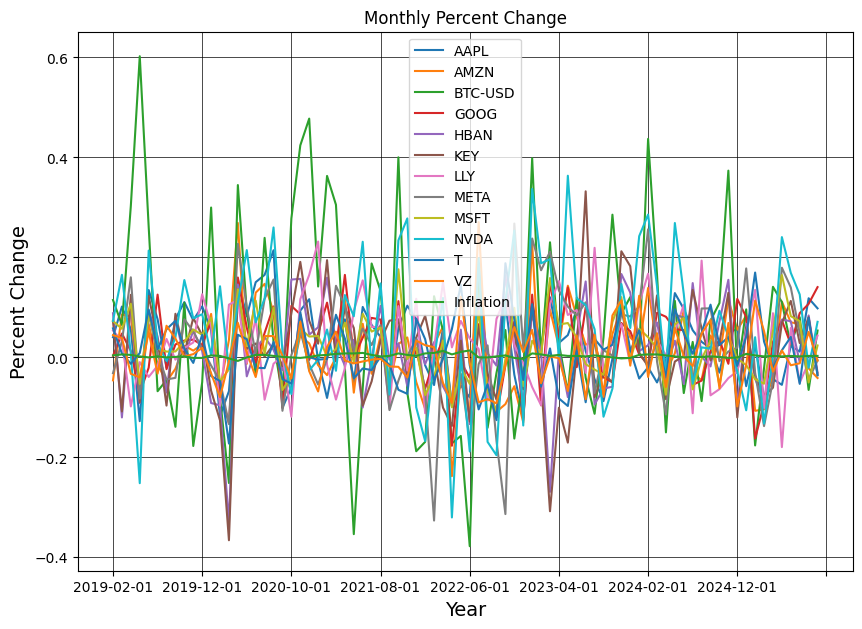

In [9]:
monthlyChanges.plot(figsize=(10,7))
plt.legend()
plt.title('Monthly Percent Change')
plt.ylabel('Percent Change', fontsize = 14)
plt.xlabel('Year', fontsize= 14)
plt.grid(which = 'major', color = 'k', linestyle = '-', linewidth = 0.5)
plt.show()

In [12]:
monthlyChanges.corr()

,AAPL,AMZN,BTC-USD,GOOG,HBAN,KEY,LLY,META,MSFT,NVDA,T,VZ,Inflation
AAPL,1.000000,0.606597,0.210965,0.493651,0.250212,0.231043,0.170880,0.352712,0.589778,0.528049,0.216481,0.184740,-0.129429
AMZN,0.606597,1.000000,0.437457,0.594583,0.204846,0.179427,0.093979,0.529388,0.669061,0.609450,-0.072210,0.112211,-0.116995
BTC-USD,0.210965,0.437457,1.000000,0.305571,0.338283,0.262054,-0.035706,0.264622,0.383785,0.174135,0.064001,0.068453,-0.133840
GOOG,0.493651,0.594583,0.305571,1.000000,0.297324,0.294856,0.065656,0.436784,0.573154,0.495962,0.038550,0.037375,-0.011129
HBAN,0.250212,0.204846,0.338283,0.297324,1.000000,0.904011,-0.157489,0.157927,0.144568,0.159885,0.307245,0.160330,-0.153839
KEY,0.231043,0.179427,0.262054,0.294856,0.904011,1.000000,-0.189526,0.181422,0.153586,0.157872,0.338581,0.215846,-0.153405
LLY,0.170880,0.093979,-0.035706,0.065656,-0.157489,-0.189526,1.000000,-0.036805,0.245367,0.126130,0.069212,0.117455,0.083740
META,0.352712,0.529388,0.264622,0.436784,0.157927,0.181422,-0.036805,1.000000,0.568183,0.528533,0.113444,0.175296,-0.139717
MSFT,0.589778,0.669061,0.383785,0.573154,0.144568,0.153586,0.245367,0.568183,1.000000,0.650566,0.092950,0.246483,-0.103715
NVDA,0.528049,0.609450,0.174135,0.495962,0.159885,0.157872,0.126130,0.528533,0.650566,1.000000,0.062396,0.193310,0.012336


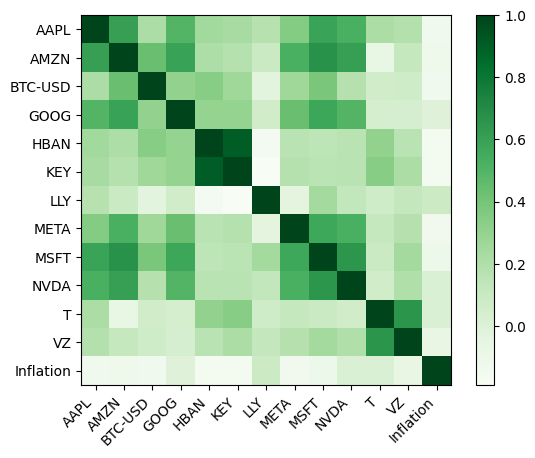

In [15]:
matrix = monthlyChanges.corr()

plt.imshow(matrix, cmap= 'Greens')

plt.colorbar()

variables = []
for i in matrix.columns:
    variables.append(i)

plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)



plt.show()

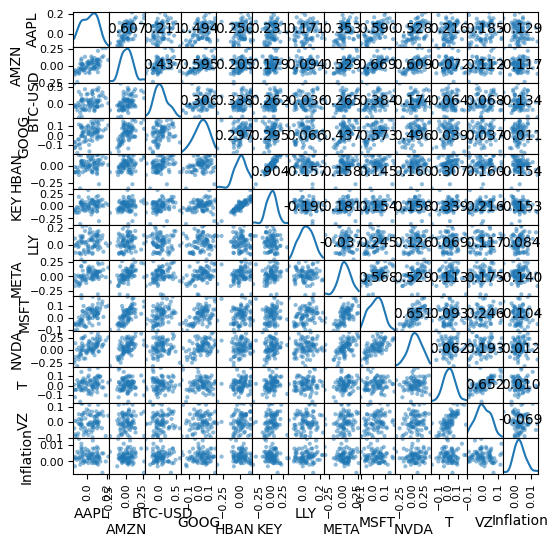

In [16]:
# scatter matrix
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Scatter matrix of monthly changes
axes = scatter_matrix(
    monthlyChanges,
    alpha=0.5,
    figsize=(6, 6),
    diagonal='kde'
)

# Add correlation coefficients to the upper panels
corr = monthlyChanges.corr().values

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate(f"{corr[i, j]:.3f}", (0.5, 0.5), xycoords='axes fraction', ha='center', va='center')

plt.show()
